In [1]:
# AI NOVATUS PBL (Problem-Based Learning) : BASE LINE CODE 

import time 
import datetime
from datetime import datetime

import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

from sklearn import model_selection
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold, cross_val_score, GridSearchCV, RepeatedStratifiedKFold, StratifiedShuffleSplit

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn import metrics
from sklearn.metrics import mean_absolute_error, accuracy_score, roc_auc_score, mean_squared_error, r2_score, confusion_matrix, precision_score, recall_score, f1_score, auc, roc_curve, precision_recall_curve

from sklearn import tree
from sklearn import ensemble

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

import lightgbm as lgb

import xgboost as xgb
from xgboost import plot_importance
from xgboost import XGBClassifier

from catboost import CatBoostClassifier

import statsmodels.api as sm

# from keras.models import Sequential
# from keras.layers import LSTM
# from keras.layers import Dropout
# from keras.layers import Dense

import warnings
warnings.filterwarnings('ignore')

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

print("Setup Complete")

C:\Users\i0204390\Miniconda3\envs\ml\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


Setup Complete


In [2]:
df = pd.read_csv(r'D:\ml\input\센서 데이터\pre_sensor.csv')
df.drop(['Unnamed: 0', 'timestamp'], axis=1, inplace=True)
df.head()

,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,...,sensor_41,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,operation
0,0.967194,0.830145,0.876660,0.884816,0.792242,0.764598,0.602472,0.683630,0.638905,0.602141,...,0.025424,0.027367,0.045424,0.014256,0.133858,0.071489,0.039791,0.245946,0.093853,0.0
1,0.967194,0.830145,0.876660,0.884816,0.792242,0.764598,0.602472,0.683630,0.638905,0.602141,...,0.025424,0.027367,0.045424,0.014256,0.133858,0.071489,0.039791,0.245946,0.093853,0.0
2,0.959089,0.834736,0.876660,0.890052,0.797904,0.735461,0.598568,0.679645,0.640988,0.600405,...,0.024120,0.027367,0.044746,0.013959,0.132874,0.072330,0.039791,0.242162,0.092531,0.0
3,0.965264,0.830145,0.874763,0.890052,0.784402,0.769891,0.598243,0.688535,0.644259,0.603299,...,0.024120,0.026627,0.042712,0.013662,0.130905,0.072330,0.039791,0.242162,0.091870,0.0
4,0.959475,0.830910,0.876660,0.890052,0.794855,0.765891,0.599870,0.687002,0.644259,0.603299,...,0.025424,0.026627,0.044068,0.013365,0.131890,0.074012,0.041885,0.246487,0.091210,0.0


In [3]:
# if 'timestamp' in df.columns:
#     df['timestamp'] = pd.to_datetime(df['timestamp'])

# if df.index.dtype == 'datetime64[ns]':
#     df.set_index('timestamp', inplace=True)

In [4]:
df_fi = df.copy()

df_fi['target'] = 0
df_fi.loc[df_fi['operation'] != 0, 'target'] = 1
df_fi.drop(['operation'], axis=1, inplace=True)
df_fi.head()

,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,...,sensor_41,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,target
0,0.967194,0.830145,0.876660,0.884816,0.792242,0.764598,0.602472,0.683630,0.638905,0.602141,...,0.025424,0.027367,0.045424,0.014256,0.133858,0.071489,0.039791,0.245946,0.093853,0
1,0.967194,0.830145,0.876660,0.884816,0.792242,0.764598,0.602472,0.683630,0.638905,0.602141,...,0.025424,0.027367,0.045424,0.014256,0.133858,0.071489,0.039791,0.245946,0.093853,0
2,0.959089,0.834736,0.876660,0.890052,0.797904,0.735461,0.598568,0.679645,0.640988,0.600405,...,0.024120,0.027367,0.044746,0.013959,0.132874,0.072330,0.039791,0.242162,0.092531,0
3,0.965264,0.830145,0.874763,0.890052,0.784402,0.769891,0.598243,0.688535,0.644259,0.603299,...,0.024120,0.026627,0.042712,0.013662,0.130905,0.072330,0.039791,0.242162,0.091870,0
4,0.959475,0.830910,0.876660,0.890052,0.794855,0.765891,0.599870,0.687002,0.644259,0.603299,...,0.025424,0.026627,0.044068,0.013365,0.131890,0.074012,0.041885,0.246487,0.091210,0


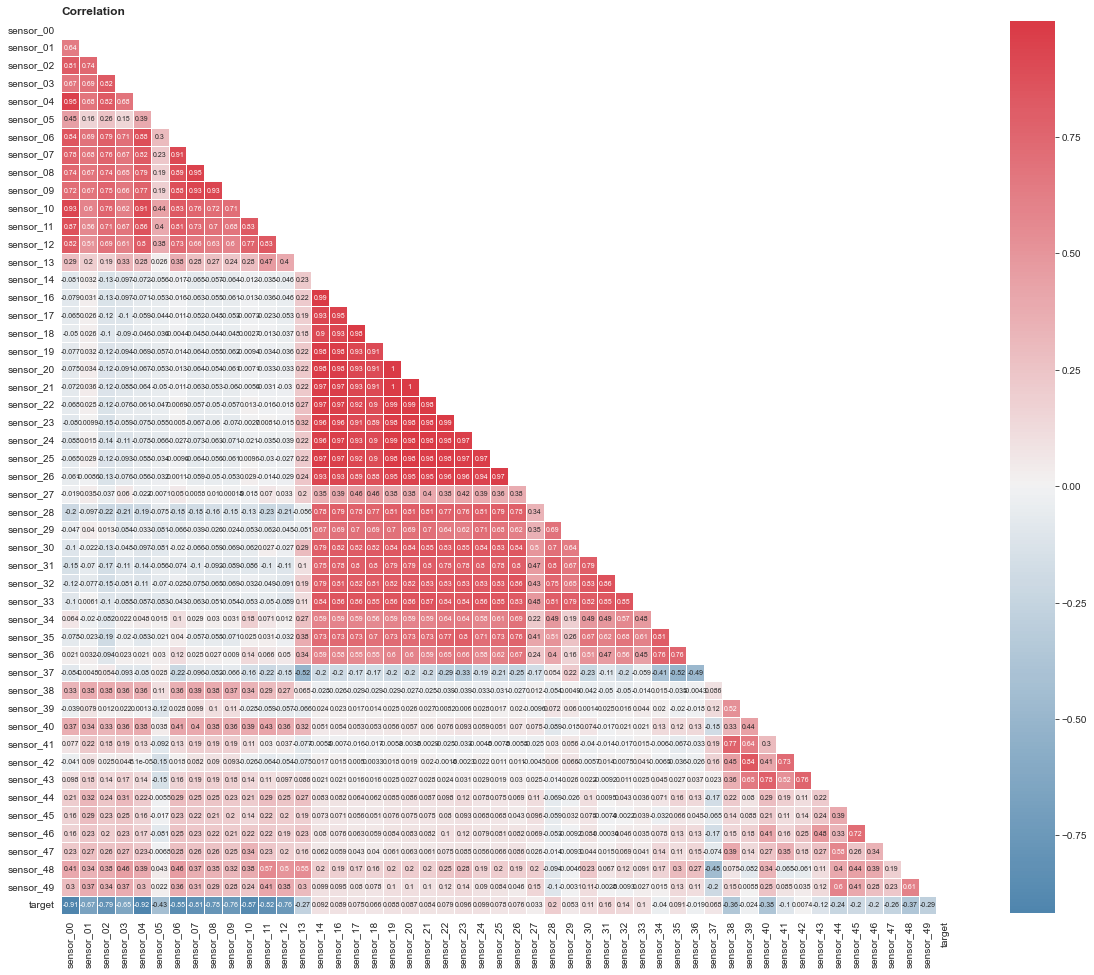

In [5]:
# Heatmap for the entire data

fig, ax = plt.subplots(1, 1, figsize=(20, 20))
df_fi_corr = df_fi.corr()

mask = np.zeros_like(df_fi_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(df_fi_corr, ax=ax,
           square=True, center=0, linewidth=1,
           cmap=sns.diverging_palette(240, 10, as_cmap=True),
           cbar_kws={'shrink': .82},
           mask=mask,
           annot=True,
           annot_kws={'size':7}
           )
ax.set_title(f'Correlation', loc='left', fontweight='bold')
plt.show()

In [6]:
X = df_fi.drop(['target'], axis=1)
y = df_fi['target']
X.head()

,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,...,sensor_40,sensor_41,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49
0,0.967194,0.830145,0.876660,0.884816,0.792242,0.764598,0.602472,0.683630,0.638905,0.602141,...,0.096328,0.025424,0.027367,0.045424,0.014256,0.133858,0.071489,0.039791,0.245946,0.093853
1,0.967194,0.830145,0.876660,0.884816,0.792242,0.764598,0.602472,0.683630,0.638905,0.602141,...,0.096328,0.025424,0.027367,0.045424,0.014256,0.133858,0.071489,0.039791,0.245946,0.093853
2,0.959089,0.834736,0.876660,0.890052,0.797904,0.735461,0.598568,0.679645,0.640988,0.600405,...,0.094199,0.024120,0.027367,0.044746,0.013959,0.132874,0.072330,0.039791,0.242162,0.092531
3,0.965264,0.830145,0.874763,0.890052,0.784402,0.769891,0.598243,0.688535,0.644259,0.603299,...,0.099521,0.024120,0.026627,0.042712,0.013662,0.130905,0.072330,0.039791,0.242162,0.091870
4,0.959475,0.830910,0.876660,0.890052,0.794855,0.765891,0.599870,0.687002,0.644259,0.603299,...,0.109101,0.025424,0.026627,0.044068,0.013365,0.131890,0.074012,0.041885,0.246487,0.091210


In [7]:
print(X.shape)
print(y.shape)

(220320, 49)
(220320,)


### CHECK : Metrics and Scoring (using all (49) sensor signal)

In [8]:
from functools import partial
from scipy import optimize

class OptimizeAUC:
    def __init__(self):
        self.coef_ = 0
        
    def _auc(self, coef, X, y):
        '''
        :params coef : weight list
        '''
        x_coef = X * coef
        predictions = np.sum(x_coef, axis=1)
        auc_score = metrics.roc_auc_score(y, predictions)
        
        return -1.0 * auc_score
    
    def fit(self, X, y):
        loss_partial = partial(self._auc, X=X, y=y)
        initial_coef = np.random.dirichlet(np.ones(X.shape[1]), size=1)
        self.coef_ = optimize.fmin(loss_partial, initial_coef, disp=True)
        
    def predict(self, X):
        x_coef = X * self.coef_
        predictions = np.sum(x_coef, axis=1)
        
        return predictions

In [9]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(
    X,
    y,
    test_size=0.5,
    stratify=y,
    shuffle=True,
    random_state=42
)

scaler = MinMaxScaler(feature_range=(0, 1))
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

xgb = xgb.XGBClassifier(random_state=42,
                        booster='gbtree',
                        n_jobs=-1,
                        eval_metric='error',
                        learning_rate=0.1,
                        n_estimators=300,
                        max_depth=5,
                        reg_lambda=2
                       )

rf = ensemble.RandomForestClassifier(random_state=42)
tree = DecisionTreeClassifier(random_state=42)
knn = KNeighborsClassifier(n_jobs=-1)

xgb.fit(x_train_scaled, y_train)
rf.fit(x_train_scaled, y_train)
tree.fit(x_train_scaled, y_train)
knn.fit(x_train_scaled, y_train)

pred_xgb = xgb.predict_proba(x_test_scaled)[:, 1]
pred_rf = rf.predict_proba(x_test_scaled)[:, 1]
pred_tree = tree.predict_proba(x_test_scaled)[:, 1]
pred_knn = knn.predict_proba(x_test_scaled)[:, 1]
avg_pred = (pred_xgb + pred_rf + pred_tree + pred_knn) / 4

test_preds = np.column_stack((
            pred_xgb,
            pred_rf,
            pred_tree,
            pred_knn,
            avg_pred
))

aucs_test = []

for i in range(test_preds.shape[1]):
    auc = metrics.roc_auc_score(y_test, test_preds[:, i])
    aucs_test.append(auc)
    
print(f"Test Set: XGBoost AUC = {aucs_test[0]}")
print(f"Test Set: RandomForest AUC = {aucs_test[1]}")
print(f"Test Set: DecisionTree AUC = {aucs_test[2]}")
print(f"Test Set: KNN AUC = {aucs_test[3]}")
print(f"Test Set: Average Pred AUC = {aucs_test[4]}")

xgb.fit(x_test_scaled, y_test)
rf.fit(x_test_scaled, y_test)
tree.fit(x_test_scaled, y_test)
knn.fit(x_test_scaled, y_test)

pred_xgb = xgb.predict_proba(x_train_scaled)[:, 1]
pred_rf = rf.predict_proba(x_train_scaled)[:, 1]
pred_tree = tree.predict_proba(x_train_scaled)[:, 1]
pred_knn = knn.predict_proba(x_train_scaled)[:, 1]
avg_pred = (pred_xgb + pred_rf + pred_tree + pred_knn) / 4

train_preds = np.column_stack((
            pred_xgb,
            pred_rf,
            pred_tree,
            pred_knn,
            avg_pred
))

aucs_train = []

for i in range(train_preds.shape[1]):
    auc = metrics.roc_auc_score(y_train, train_preds[:, i])
    aucs_train.append(auc)
    
print(f"Test Set: XGBoost AUC = {aucs_train[0]}")
print(f"Test Set: RandomForest AUC = {aucs_train[1]}")
print(f"Test Set: DecisionTree AUC = {aucs_train[2]}")
print(f"Test Set: KNN AUC = {aucs_train[3]}")
print(f"Test Set: Average Pred AUC = {aucs_train[4]}")

opt = OptimizeAUC()
opt.fit(train_preds[:, :-1], y_train)
opt_preds_test = opt.predict(test_preds[:, :-1])
auc = metrics.roc_auc_score(y_test, opt_preds_test)

print(f"Optimized AUC, Test set = {auc}")
print(f"Coefficients = {opt.coef_}")

opt = OptimizeAUC()
opt.fit(test_preds[:, :-1], y_test)
opt_preds_train = opt.predict(train_preds[:, :-1])
auc = metrics.roc_auc_score(y_train, opt_preds_train)

print(f"Optimized AUC, Train set = {auc}")
print(f"Coefficients = {opt.coef_}")         

Test Set: XGBoost AUC = 0.9999998108225993
Test Set: RandomForest AUC = 0.9999998671733143
Test Set: DecisionTree AUC = 0.9983946607021206
Test Set: KNN AUC = 0.9999257485410303
Test Set: Average Pred AUC = 0.9999997558135678
Test Set: XGBoost AUC = 0.9999994163675934
Test Set: RandomForest AUC = 0.9999996243285659
Test Set: DecisionTree AUC = 0.9979318281284513
Test Set: KNN AUC = 0.9999255103921748
Test Set: Average Pred AUC = 0.9999993680669804
Optimization terminated successfully.
         Current function value: -1.000000
         Iterations: 58
         Function evaluations: 140
Optimized AUC, Test set = 0.9999998846152023
Coefficients = [ 0.57008892  0.82137068 -0.07827419  0.28355402]
Optimization terminated successfully.
         Current function value: -1.000000
         Iterations: 19
         Function evaluations: 69
Optimized AUC, Train set = 0.9999992365819784
Coefficients = [0.43801678 0.0231102  0.31350043 0.21378003]


### Feature Importance

reference : https://towardsdatascience.com/the-mathematics-of-decision-trees-random-forest-and-feature-importance-in-scikit-learn-and-spark-f2861df67e3

Permutation feature importance : https://scikit-learn.org/stable/modules/permutation_importance.html (for tabular data)

the scoring params : https://scikit-learn.org/stable/modules/model_evaluation.html#multimetric-scoring

#### Boosting Algorithm feature importance

below LGB original code : https://www.kaggle.com/code/artgor/simple-eda-and-models

In [10]:
n_fold = 5
folds = StratifiedKFold(n_splits=n_fold, shuffle=True, random_state=42)

In [11]:
def train_model(X, y, params, folds, model_type='lgb', plot_feature_importance=False, averaging='using', model=None):
    oof = np.zeros(len(X))
    scores = []
    feature_importance = pd.DataFrame()
    
    for fold_n, (train_index, valid_index) in enumerate(folds.split(X, y)):
        print("********* Fold: ", fold_n)
        
        X_train, X_valid = X.loc[train_index], X.loc[valid_index]
        y_train, y_valid = y[train_index], y[valid_index]
        
        scaler = StandardScaler() # MinMaxScaler
        
        X_train = scaler.fit_transform(X_train)
        X_valid = scaler.transform(X_valid)
        
        if model_type == 'lgb': # light gbm
            train = lgb.Dataset(X_train, label=y_train)
            valid = lgb.Dataset(X_valid, label=y_valid)
            
            model = lgb.train(params,
                             train,
                             num_boost_round=1000,
                             valid_sets=[train, valid],
                             verbose_eval=500,
                             early_stopping_rounds=200
                             )
            
            y_pred_valid = model.predict(X_valid)
            
        if model_type == 'lgb':
            # feature importance
            fold_importance = pd.DataFrame()
            fold_importance["feature"] = X.columns
            fold_importance["importance"] = model.feature_importance()
            fold_importance["fold"] = fold_n + 1
            feature_importance = pd.concat([feature_importance, fold_importance], axis=0)
            
#     print('CV mean score: {0:.4f}, std: {1:.4f}.'.format(np.mean(scores), np.std(scores)))
    
    if model_type == 'lgb':
        feature_importance["importance"] /= n_fold
        if plot_feature_importance:
            cols = feature_importance[["feature", "importance"]].groupby("feature").mean().sort_values(
                by="importance", ascending=False)[:50].index

            best_features = feature_importance.loc[feature_importance.feature.isin(cols)]

            plt.figure(figsize=(16, 12));
            sns.barplot(x="importance", y="feature", data=best_features.sort_values(by="importance", ascending=False));
            plt.title('LGB Features (avg over folds)');
        
            return oof,  feature_importance
        return oof,  scores
    
    else:
        return oof,  scores         

********* Fold:  0
Training until validation scores don't improve for 200 rounds
[500]	training's auc: 0.999996	valid_1's auc: 0.999999
[1000]	training's auc: 0.999999	valid_1's auc: 1
Did not meet early stopping. Best iteration is:
[1000]	training's auc: 0.999999	valid_1's auc: 1
********* Fold:  1
Training until validation scores don't improve for 200 rounds
[500]	training's auc: 0.999996	valid_1's auc: 0.999998
[1000]	training's auc: 0.999999	valid_1's auc: 0.999999
Did not meet early stopping. Best iteration is:
[1000]	training's auc: 0.999999	valid_1's auc: 0.999999
********* Fold:  2
Training until validation scores don't improve for 200 rounds
[500]	training's auc: 0.999995	valid_1's auc: 0.999993
[1000]	training's auc: 0.999999	valid_1's auc: 0.999999
Did not meet early stopping. Best iteration is:
[1000]	training's auc: 0.999999	valid_1's auc: 0.999999
********* Fold:  3
Training until validation scores don't improve for 200 rounds
[500]	training's auc: 0.999996	valid_1's auc:

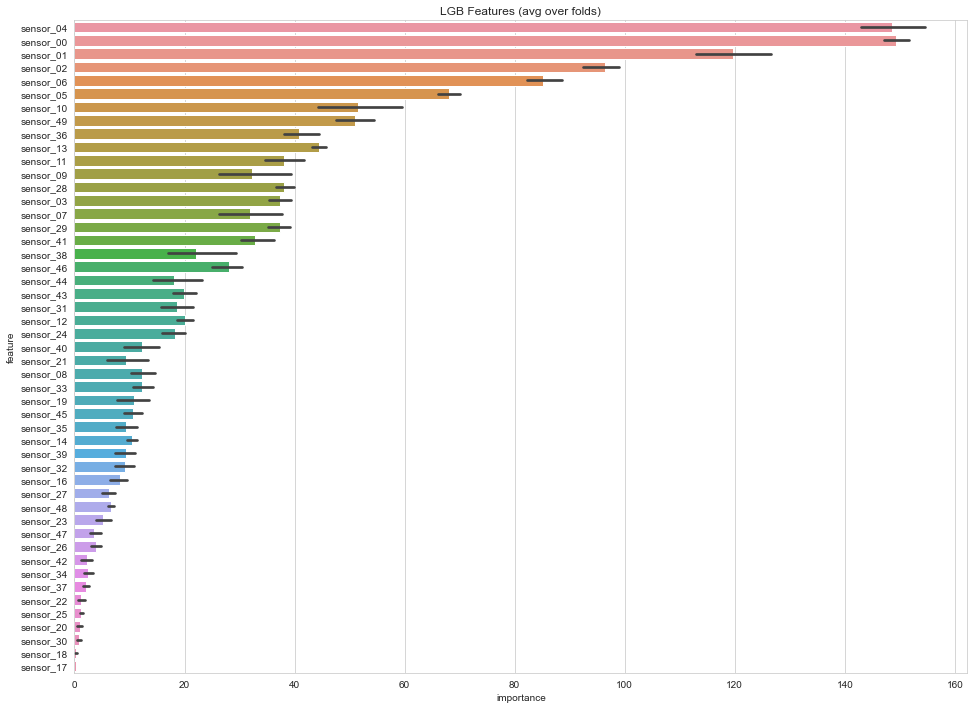

In [12]:
params = {'num_leaves': 8,
         'min_data_in_leaf': 42,
         'objective': 'binary',
         'max_depth': 5,
         'learning_rate': 0.01,
         'boosting': 'gbdt',
         'bagging_freq': 5,
         'feature_fraction': 0.8201,
         'bagging_seed': 11,
         'reg_alpha': 1,
         'reg_lambda': 4,
         'random_state': 42,
         'metric': 'auc',
         'verbosity': -1,
         'subsample': 0.81,
         'num_threads': 4}
oof_lgb, scores = train_model(X, y, params=params, folds=folds, model_type='lgb', plot_feature_importance=True)

#### XGBoost

In [13]:
import xgboost as xgb

xgb_params = {"booster": 'gbtree',
             "max_depth": 5,
             "learning_rate": 0.1,
             "eval_metric": 'error',
             "n_jobs": -1,
             "random_state": 42,
             "reg_lambda": 2}

num_rounds = 300 

dtrain = xgb.DMatrix(x_train, label=y_train)
gbdt = xgb.train(xgb_params, dtrain, num_rounds)

https://www.kaggle.com/code/mmueller/xgb-feature-importance-python/script

Text(0.5, 0, 'relative importance')

<Figure size 432x288 with 0 Axes>

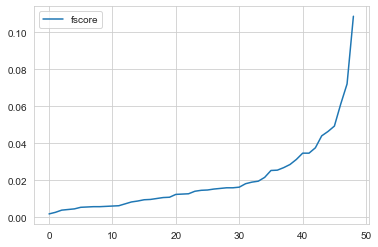

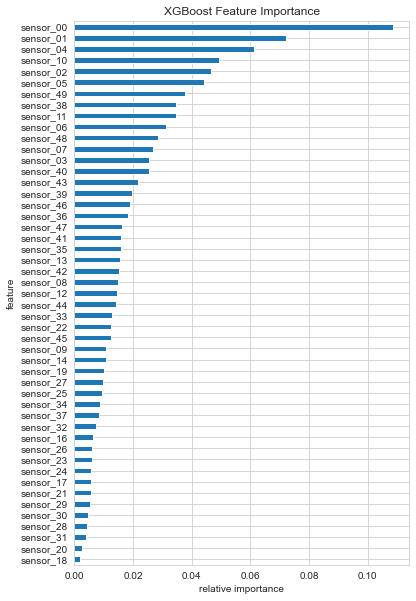

In [14]:
import operator

importance = gbdt.get_fscore()
importance = sorted(importance.items(), key=operator.itemgetter(1))

df_feature_impo = pd.DataFrame(importance, columns=['feature', 'fscore'])
df_feature_impo['fscore'] = df_feature_impo['fscore'] / df_feature_impo['fscore'].sum()

plt.figure()
df_feature_impo.plot()
df_feature_impo.plot(kind='barh', x='feature', y='fscore', legend=False, figsize=(6, 10))
plt.title('XGBoost Feature Importance')
plt.xlabel('relative importance')
# plt.gcf().savefig('feature_importance_xgb.png')

The use of feature importances in tree models results in high importance due to the high probability of being used in branches, thus risking overfitting the model.
Permutation feature importance arbitrarily disrupts the distribution of characteristics and shows how much the characteristics affect the result value (importance) compared to the existing results.

#### Permutation feature importance

1. XGBoost

In [15]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(
    X,
    y,
    test_size=0.5,
    stratify=y,
    shuffle=True,
    random_state=42
)

scaler = MinMaxScaler(feature_range=(0, 1))
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [16]:
xgb = xgb.XGBClassifier(random_state=42,
                        booster='gbtree',
                        n_jobs=-1,
                        eval_metric='error',
                        learning_rate=0.1,
                        n_estimators=300,
                        max_depth=5,
                        reg_lambda=2)

permu_fi = xgb.fit(x_train_scaled, y_train)
permu_fi.score(x_test_scaled, y_test)

0.9998910675381264

In [17]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(permu_fi, random_state=42).fit(x_test_scaled, y_test)
eli5.show_weights(perm, feature_names=x_test.columns.tolist())

Weight,Feature
0.0013 ± 0.0002,sensor_04
0.0006 ± 0.0001,sensor_00
0.0004 ± 0.0000,sensor_10
0.0004 ± 0.0001,sensor_02
0.0003 ± 0.0001,sensor_01
0.0001 ± 0.0000,sensor_11
0.0001 ± 0.0000,sensor_27
0.0001 ± 0.0000,sensor_49
0.0001 ± 0.0000,sensor_03
0.0000 ± 0.0000,sensor_36


2. CatBoost

In [18]:
from catboost import CatBoostClassifier
import eli5
from eli5.sklearn import PermutationImportance

cb = CatBoostClassifier(silent=True, 
                        task_type='GPU',
                        random_state=42, 
                        n_estimators=300,
                        eval_metric='Logloss',
                        learning_rate=0.1
)

cb.fit(x_train_scaled, y_train)
cb.score(x_test_scaled, y_test)

0.9998910675381264

In [19]:
perm = PermutationImportance(cb, random_state=42).fit(x_test_scaled, y_test)
eli5.show_weights(perm, feature_names=x_test.columns.tolist())

Weight,Feature
0.0019 ± 0.0001,sensor_04
0.0012 ± 0.0001,sensor_00
0.0002 ± 0.0001,sensor_02
0.0001 ± 0.0000,sensor_11
0.0001 ± 0.0000,sensor_27
0.0001 ± 0.0000,sensor_05
0.0001 ± 0.0000,sensor_01
0.0001 ± 0.0000,sensor_12
0.0001 ± 0.0000,sensor_39
0.0001 ± 0.0000,sensor_09


3. RandomForest

* No max_depth

In [20]:
rf = ensemble.RandomForestClassifier(random_state=42)
rf.fit(x_train_scaled, y_train)
rf.score(x_test_scaled, y_test)

0.9999183006535948

In [21]:
perm = PermutationImportance(rf, random_state=42).fit(x_test_scaled, y_test)
eli5.show_weights(perm, feature_names=x_test.columns.tolist())

Weight,Feature
0.0004 ± 0.0001,sensor_04
0.0001 ± 0.0000,sensor_06
0.0001 ± 0.0000,sensor_10
0.0001 ± 0.0000,sensor_00
0.0000 ± 0.0000,sensor_11
0.0000 ± 0.0000,sensor_02
0.0000 ± 0.0000,sensor_12
0.0000 ± 0.0000,sensor_01
0.0000 ± 0.0000,sensor_45
0.0000 ± 0.0000,sensor_46


* Max_depth = 6

In [22]:
rf = ensemble.RandomForestClassifier(random_state=42,
                                     max_depth=6)
rf.fit(x_train_scaled, y_train)
rf.score(x_test_scaled, y_test)

0.9992737835875091

In [23]:
perm = PermutationImportance(rf, random_state=42).fit(x_test_scaled, y_test)
eli5.show_weights(perm, feature_names=x_test.columns.tolist())

Weight,Feature
0.0004 ± 0.0000,sensor_04
0.0003 ± 0.0000,sensor_06
0.0002 ± 0.0001,sensor_01
0.0002 ± 0.0000,sensor_00
0.0002 ± 0.0000,sensor_03
0.0002 ± 0.0000,sensor_08
0.0002 ± 0.0000,sensor_10
0.0001 ± 0.0000,sensor_49
0.0001 ± 0.0000,sensor_40
0.0001 ± 0.0000,sensor_02


* Max_depth = 10

In [24]:
rf = ensemble.RandomForestClassifier(random_state=42,
                                     max_depth=10)
rf.fit(x_train_scaled, y_train)
rf.score(x_test_scaled, y_test)

0.9999001452432825

In [25]:
perm = PermutationImportance(rf, random_state=42).fit(x_test_scaled, y_test)
eli5.show_weights(perm, feature_names=x_test.columns.tolist())

Weight,Feature
0.0110 ± 0.0003,sensor_06
0.0002 ± 0.0000,sensor_04
0.0001 ± 0.0000,sensor_10
0.0001 ± 0.0000,sensor_00
0.0001 ± 0.0000,sensor_11
0.0001 ± 0.0000,sensor_02
0.0000 ± 0.0000,sensor_08
0.0000 ± 0.0000,sensor_36
0.0000 ± 0.0000,sensor_05
0.0000 ± 0.0000,sensor_01


* Max_depth = 15

In [26]:
rf = ensemble.RandomForestClassifier(random_state=42,
                                     max_depth=15)
rf.fit(x_train_scaled, y_train)
rf.score(x_test_scaled, y_test)

0.9999273783587509

In [27]:
perm = PermutationImportance(rf, random_state=42).fit(x_test_scaled, y_test)
eli5.show_weights(perm, feature_names=x_test.columns.tolist())

Weight,Feature
0.0004 ± 0.0001,sensor_04
0.0001 ± 0.0000,sensor_06
0.0001 ± 0.0000,sensor_10
0.0001 ± 0.0000,sensor_00
0.0001 ± 0.0000,sensor_02
0.0000 ± 0.0000,sensor_11
0.0000 ± 0.0000,sensor_45
0.0000 ± 0.0000,sensor_01
0.0000 ± 0.0000,sensor_12
0.0000 ± 0.0000,sensor_46


## Result

**feature importance**  
* LGB : Sensor 04 - 00 - 01 - 02  
* XGB : Sensor 00 - 01 - 04 - 10  
* Permutation importance (XGB) : Sensor 04 - 00 - 10 - 02  
* Permutation importance (CATBoost) : Sensor 04 - 00  
* Permutation importance (Random Forest, no Max_Depth) : Sensor 04  
* Permutation importance (Random Forest, Max_Depth=6) : Sensor 04 - 06 - 01 - 00  
* Permutation importance (Random Forest, Max_Depth=10) : Sensor 06  
* Permutation importance (Random Forest, Max_Depth=15) : Sensor 04  
**the Most important Sensors : 04, 00, 01, 06, 10**

Compared to impurity-based feature importance, Permutation Feature Importance seems to provide a fairly robust feature importance.